In [49]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [50]:
power_countries_1986_2015 = pd.read_csv("EMHIRESPV_TSh_CF_Country_19862015.csv")


In [51]:
#print(power_countries_1986_2015.head())

In [52]:
#print(meteorological_france_2006_2015.head())

In [53]:
#power_countries_1986_2015.shape

In [54]:
#meteorological_france_2006_2015.shape

In [55]:
t_h = pd.date_range('1/1/1986', periods=262968, freq='H')

In [56]:
power_countries_1986_2015["HOUR"] = t_h
power_countries_1986_2015.set_index("HOUR", inplace = True)

In [57]:
#print(power_countries_1986_2015.head())

In [58]:
power_countries_1986_2015['DAY']=power_countries_1986_2015.index.map(lambda x: x.strftime('%Y-%m-%d'))
power_countries_1986_2015_day = power_countries_1986_2015.groupby('DAY').sum()

In [59]:
power_countries_1986_2015_day.shape

(10957, 29)

In [60]:
#print(power_countries_1986_2015_day.head())

In [61]:
power_countries_2006_2015_day = power_countries_1986_2015_day.loc["2006-01-01":"2015-12-31"]

In [62]:
power_countries_2006_2015_day.shape

(3652, 29)

In [63]:
t_d = pd.date_range('1/1/2006', periods=3652, freq='D')
t_d.shape

(3652,)

In [64]:
power_france_2006_2015_day = power_countries_2006_2015_day["FR"]

In [65]:
power_france_2006_2015_day.shape

(3652,)

In [66]:
power_france_2006_2015_day.head()

DAY
2006-01-01    0.981080
2006-01-02    1.201579
2006-01-03    1.113526
2006-01-04    1.471551
2006-01-05    1.014190
Name: FR, dtype: float64

In [67]:
meteorological_france_2006_2015 = pd.read_csv("france_2006_2015_ver2_0_9258_487749847.csv", sep=";")
meteorological_france_2006_2015_day = meteorological_france_2006_2015.groupby('DAY').mean()

In [68]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [70]:
meteorological_france_2006_2015_day.head

<bound method NDFrame.head of                GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  TEMPERATURE_MAX  \
DAY                                                                         
20060101  82982.985045  46.453877   2.589603  290.929212         7.536590   
20060102  82982.985045  46.453877   2.589603  290.929212         6.788734   
20060103  82982.985045  46.453877   2.589603  290.929212         6.067498   
20060104  82982.985045  46.453877   2.589603  290.929212         4.679661   
20060105  82982.985045  46.453877   2.589603  290.929212         2.080359   
20060106  82982.985045  46.453877   2.589603  290.929212         3.779063   
20060107  82982.985045  46.453877   2.589603  290.929212         4.402193   
20060108  82982.985045  46.453877   2.589603  290.929212         6.149950   
20060109  82982.985045  46.453877   2.589603  290.929212         5.574177   
20060110  82982.985045  46.453877   2.589603  290.929212         5.240379   
20060111  82982.985045  46.453877   2.589603  

In [71]:
meteorological_france_2006_2015_day["DAY"] = t_d
meteorological_france_2006_2015_day.set_index("DAY", inplace=True)

In [72]:
#meteorological_france_2006_2015_day.head

In [73]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [74]:
#print(meteorological_france_2006_2015_day.head())

In [75]:
france_2006_2015_day = pd.concat([power_france_2006_2015_day, meteorological_france_2006_2015_day], axis=1)

In [76]:
france_2006_2015_day.shape

(3652, 16)

In [77]:
print(france_2006_2015_day.head())

                  FR       GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  \
DAY                                                                    
2006-01-01  0.981080  82982.985045  46.453877   2.589603  290.929212   
2006-01-02  1.201579  82982.985045  46.453877   2.589603  290.929212   
2006-01-03  1.113526  82982.985045  46.453877   2.589603  290.929212   
2006-01-04  1.471551  82982.985045  46.453877   2.589603  290.929212   
2006-01-05  1.014190  82982.985045  46.453877   2.589603  290.929212   

            TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  \
DAY                                                                        
2006-01-01         7.536590         2.931306         5.234895   5.001097   
2006-01-02         6.788734         3.453141         5.121934   3.652941   
2006-01-03         6.067498         1.962014         4.015254   2.862612   
2006-01-04         4.679661         0.788136         2.735593   3.160020   
2006-01-05         2.080359        -1.5

In [78]:
france_2006_2015_day.index = pd.to_datetime(france_2006_2015_day.index)
france_2006_2015_day.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='DAY', length=3652, freq=None)

In [79]:
france_2006_2015_day["MONTH"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y-%m"))
france_2006_2015_day["MONTH_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%m"))
france_2006_2015_month = france_2006_2015_day.groupby("MONTH").mean()
france_2006_2015_month.index = pd.to_datetime(france_2006_2015_month.index)
france_2006_2015_month.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='MONTH', length=120, freq=None)

In [80]:
print(france_2006_2015_month.head())

                  FR       GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  \
MONTH                                                                  
2006-01-01  1.711850  82982.985045  46.453877   2.589603  290.929212   
2006-02-01  1.796412  82982.985045  46.453877   2.589603  290.929212   
2006-03-01  2.692156  82982.985045  46.453877   2.589603  290.929212   
2006-04-01  3.689884  82982.985045  46.453877   2.589603  290.929212   
2006-05-01  3.767550  82982.985045  46.453877   2.589603  290.929212   

            TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  \
MONTH                                                                      
2006-01-01         5.890522         0.120606         3.006030   3.231396   
2006-02-01         6.563517         0.210504         3.387327   3.574530   
2006-03-01        10.895160         3.095089         6.995607   4.411556   
2006-04-01        15.449438         5.642047        10.546248   3.418664   
2006-05-01        19.311877         9.7

In [81]:
france_2006_2015_day["YEAR"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y"))
france_2006_2015_day["DAY_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%d"))

# Regression Analysis.

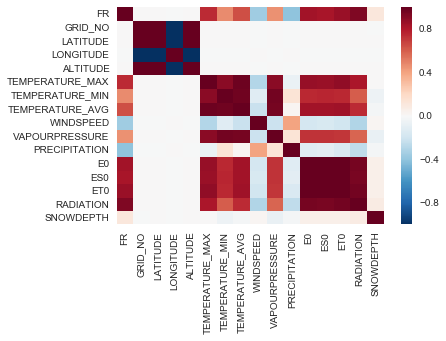

In [83]:
#Getting correlation matrix of the full dataset
corr = france_2006_2015_day.corr()
sns.heatmap(corr)#, 
        #xticklabels=corr.columns,
        #yticklabels=corr.columns)

In [84]:
france_2006_2015_day.groupby('ALTITUDE').nunique()

,FR,GRID_NO,LATITUDE,LONGITUDE,ALTITUDE,TEMPERATURE_MAX,TEMPERATURE_MIN,TEMPERATURE_AVG,WINDSPEED,VAPOURPRESSURE,PRECIPITATION,E0,ES0,ET0,RADIATION,SNOWDEPTH,MONTH,MONTH_ONLY,YEAR,DAY_ONLY
ALTITUDE,,,,,,,,,,,,,,,,,,,,
290.929212,3652,1,1,1,1,3650,3648,3650,3646,3651,3635,3650,3651,3652,3651,2086,120,12,10,31


In [85]:
#Selecting datasets that have maximum correlation with the output and minimum internal correlation.
france_2006_2015 = france_2006_2015_day[['FR','WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']] 
#Ignored the following columns'TEMPERATURE_AVG',,'MONTH_ONLY','MONTH','DAY_ONLY','YEAR','VAPOURPRESSURE',
france_2006_2015.dtypes


FR               float64
WINDSPEED        float64
PRECIPITATION    float64
RADIATION        float64
SNOWDEPTH        float64
dtype: object

In [86]:
franceDF = france_2006_2015.apply(pd.to_numeric, errors='ignore')
franceDF.dtypes

FR               float64
WINDSPEED        float64
PRECIPITATION    float64
RADIATION        float64
SNOWDEPTH        float64
dtype: object

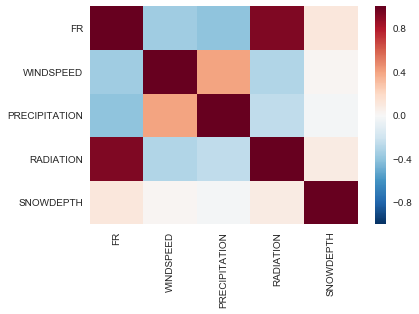

In [88]:
#Generating new correlation matrix
corr1 = franceDF.corr()
sns.heatmap(corr1)#, 
        #xticklabels=corr1.columns,
        #yticklabels=corr1.columns)
#print franceDF.corr()

In [89]:
#Clean data over here - removing NaN, Inf and Null values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

franceDF = clean_dataset(franceDF[['FR','WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']]) 

franceDF.describe()

,FR,WINDSPEED,PRECIPITATION,RADIATION,SNOWDEPTH
count,2857.000000,2857.000000,2857.000000,2857.000000,2857.000000
mean,2.864947,3.346436,2.190706,11123.464838,12.709500
std,1.348017,1.030206,2.612020,6795.822768,24.169718
min,0.394060,1.326620,0.000997,2094.080758,0.000000
25%,1.709574,2.585942,0.228814,4879.883350,0.100000
50%,2.695554,3.142173,1.153340,9590.744766,3.446481
75%,3.985883,3.961715,3.292024,16374.682951,12.837963
max,5.786712,8.331705,19.295214,29273.305085,250.000000


In [90]:
#Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(franceDF[['WINDSPEED','PRECIPITATION','RADIATION','SNOWDEPTH']], \
        franceDF['FR'], test_size=0.2, random_state=123456)

In [91]:
#X_test.shape

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=123456,
           verbose=0, warm_start=False)

In [93]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)


In [96]:
y_test.describe()
print(predicted.shape)

(572,)


In [98]:
from sklearn.metrics import mean_squared_error, r2_score
print (mean_squared_error(y_test, predicted))
print (r2_score(y_test, predicted))
print (rf)

0.14631358001
0.922770619096
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=123456,
           verbose=0, warm_start=False)


In [99]:
#modelling with gradient boosted tree regression
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [101]:
predicted_gbr = gbr.predict(X_test)
print (mean_squared_error(y_test, predicted_gbr))
print (r2_score(y_test, predicted_gbr))

0.141218160144
0.925460158383


In [102]:
#modelling with ada boosted tree regression
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(n_estimators=100)
abr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [104]:
predicted_abr = abr.predict(X_test)
print (mean_squared_error(y_test, predicted_abr))
print( r2_score(y_test, predicted_abr))
print (abr.get_params())

0.166476441702
0.912127961554
{'base_estimator': None, 'learning_rate': 1.0, 'loss': 'linear', 'n_estimators': 100, 'random_state': None}


In [105]:
from sklearn.metrics import explained_variance_score
print (explained_variance_score(y_test, predicted))
print (explained_variance_score(y_test, predicted_abr))
print (explained_variance_score(y_test, predicted_gbr))


0.923072877631
0.912849483147
0.925603951705


In [106]:
#modelling with isolation forest
from sklearn.ensemble import IsolationForest
ifr = AdaBoostRegressor(n_estimators=100)
ifr.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)

In [107]:
predicted_ifr = ifr.predict(X_test)
print (mean_squared_error(y_test, predicted_ifr))
print (r2_score(y_test, predicted_ifr))
print (explained_variance_score(y_test, predicted_ifr))

0.162304938226
0.914329825734
0.914910994342
